### LSE Data Analytics Online Career Accelerator 
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Fitting a data set using the OLS method

**This is the solution to the activity.**

In all regression models, the aim is to minimise residuals by finding the line of best fit. OLS is a common and straightforward way to estimate a linear regression model and to fit a linear equation to observed data. You’ll now have a chance to fit a data set using OLS in Python. 

An e-commerce store has asked you to analyse its online shopping experience. To help its marketing team optimise its campaign efforts to pre-existing users, the company wants to know how much money customers spend relative to how long they've been a member.

Remember, the marketing team needs to find a way to predict as accurately as possible how much money customers will spend, based on how long they have been a member of the shopping platform. Using the data set provided, you’ll need to decide on the independent and dependent variables and minimise residuals by finding the line of best fit. 

## 1. Prepare your workstation

In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols

## 2. Import the data set

In [3]:
# Import the data set.
df_test = pd.read_csv('loyalty_club.csv')

# View the DataFrame.
df_test.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 3. Define the variables

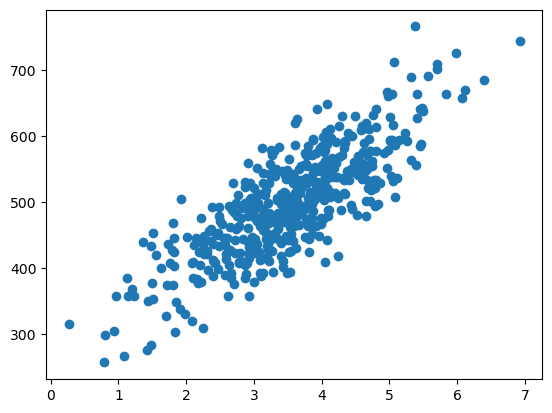

In [4]:
# Dependent variable.
y = df_test["Yearly Amount Spent"] 

# Independent variable.
X = df_test["Length of Membership"]

# Check for linearity.
plt.scatter(X,y)

## 4. Run an OLS test

In [5]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = df_test).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     943.9
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          4.81e-117
Time:                        17:04:51   Log-Likelihood:                -2629.9
No. Observations:                 500   AIC:                             5264.
Df Residuals:                     498   BIC:                             5272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    272.3998      7.675     35.492      0.000     257.320     287.479
X             64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> What does the summary indicates?
> - $R^2$: 65% of the total variability of `y` (money spent by customers), is explained by the variability of `X` (how long they have been a member).  
> - F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. For simple regression model, the `t`-statistic is equivalent.
> - `X`: The coefficient of `X` describes the slope of the regression line, in other words, how much the response variable `y` change when `X` changes by 1 unit. In this activity, if the length that the customer has been a member (`X`) changes by 1 unit (please check units used) the money spent (`y`) will change by 64.2187 units. 
>  - The `t`-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. 
>   - The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of `X` and `y`, then 95 out of the 100 samples will derive a slope that is within the interval (60.112 , 68.326).
>   - In case of a multivariate regression model, each explanatory variable will have a separate row with the above information. So we will need to check which of the variables are significant, remove the ones that are not significant and then re-run the new regression model.

## 5. Create linear equation

In [ ]:
# x coef: 64.2187.
# Constant coef: 272.3998.
# Create the linear equation.
y_pred = 272.3998 + 64.2187 * X

# View the output.
y_pred

## 6. Plot the regression

In [ ]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')